In [1]:
from PIL import Image
from astropy.io.fits import Header
from astropy.io import fits
from astropy.wcs import WCS
from pyavm import AVM
import os
import numpy as np
from glob import glob
from io import BytesIO
from aplpy import FITSFigure
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
from astropy import units as u

import wtml_tools as wtml
from importlib import reload
reload(wtml)



import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [2]:
reload(wtml)
# convenience function to add a long path for the output
def to_github(filename='', web=False):
    if web:
        return f'https://raw.githubusercontent.com/johnarban/wwt_interactives/main/images/{filename}'
    return os.path.expanduser(f'~/github/wwt_interactives/images/{filename}')

# Setup to process multiple images

In [58]:
f = './data/692_2022E3_02_01_23.jpg' 
f_t = './image/692_2022E3_02_01_23_tagged.jpg'
files = glob('./data/*.jpg')
files = list(filter(lambda x: not x.endswith('_tagged.jpg') and x != 'img.jpg',files))
tagged_files = glob('*tagged.jpg')

# Print the number of files
print('Number of files: ', len(files))

Number of files:  14


In [ ]:
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
from astropy import units as u
coord = SkyCoord('15:50:58.185 +32:02:50.365',unit=(u.hourangle, u.deg))
catalog = Vizier.query_region(coord,radius=2*u.deg,catalog='III/135A/catalog') # HD catalog
HD = catalog[0]['_RA.icrs','_DE.icrs']
HD.rename_columns(['_RA.icrs','_DE.icrs'],['ra','dec'])
HD = SkyCoord(HD['ra'],HD['dec'],unit=(u.hourangle, u.deg))


 ****** Embedding AVM in jpg file ****** 

outputting AVM tagged 692_2022E3_02_01_23 to ./test_images/692_2022E3_02_01_23_tagged.jpg
Finding the rotation angle
	CD sign = 1
	Rot (WWT) = 270.939 degrees
	Rot (Astrometry.net) = 270.937 degrees
	Using Astrometry.net method
get_scale_rot::
	scale: [0.00201242 0.00201545]
	rot: 270.937
	parity: -1
This has JPEG-like parity
flip parity for avm
flipping CD
Original CD matrix: cd_sign = 1
 [ -3.28e-05   0.00202 ]
 [  -0.00201  -3.3e-05 ]
New CD matrix: cd_sign = -1
 [ -3.28e-05  -0.00202 ]
 [  -0.00201   3.3e-05 ]
Finding the rotation angle
	CD sign = -1
	Rot (WWT) = 269.061 degrees
	Rot (Astrometry.net) = 269.063 degrees
	Using Astrometry.net method
get_scale_rot::
	scale: [0.00201242 0.00201545]
	rot: 269.063
	parity: 1
not JPEGLike parity, flipping cdelt1 (lon axis)
CoordinateFrame: b'FK5'
Equinox: b'2000.0'
ReferenceValue:
   * b'237.61437908'
   * b'32.3021488533'
ReferenceDimension:
   * b'800'
   * b'567'
ReferencePixel:
   * b'274.967

/Users/jal194/anaconda3/lib/python3.9/site-packages/aplpy/core.py:1176: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  s = self.ax.scatter(xw, yw, transform=self.ax.get_transform(coords_frame), **kwargs)


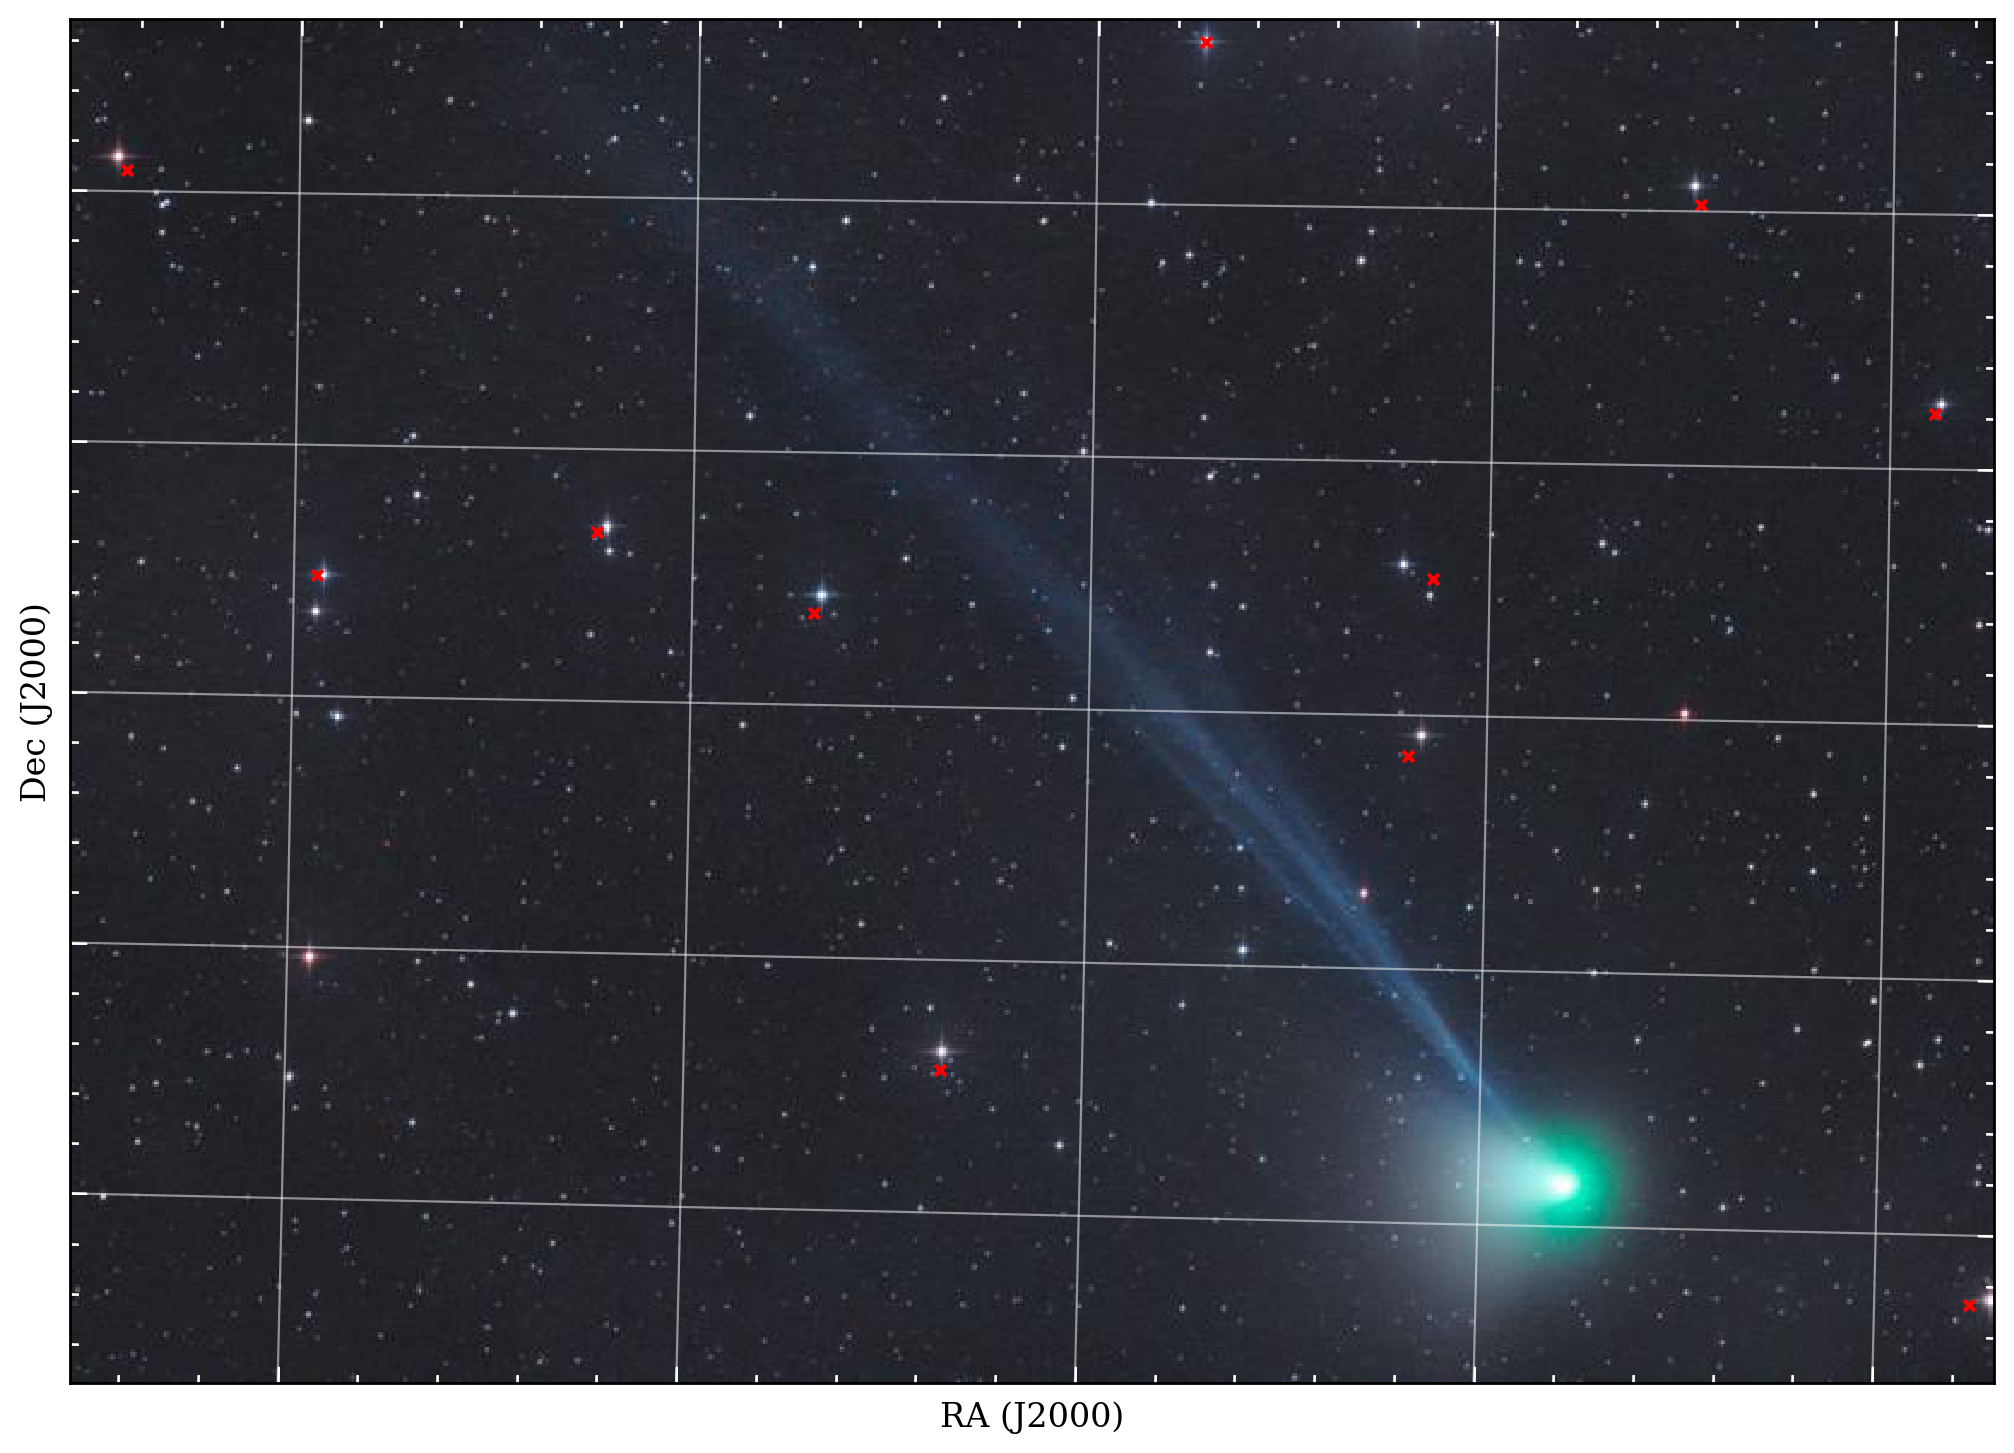

In [66]:
%%capture --no-display --no-stderr --no-stdout
reload(wtml)

f = './data/692_2022E3_02_01_23.jpg'
name = '692_2022E3_02_01_23' #f.split('/')[-1].split('.')[0]
output = wtml.add_avm_tags_simple(f,name=name, 
                                    path_out='./test_images/',
                                    suffix='')
header, old_wcs, new_header, wcs_for_embed, avm, out, im = output

# hd = wtml.wh.header_cd_to_cdelt_crota(wcs_for_embed.to_header())
# hd = wtml.wh.add_NAXES(hd,im)
# out includes full path. but we only need a relative path for the wtml
# url = to_github(os.path.basename(out), web=True)
url = 'url'
tree, imageset = wtml.create_wtml(new_header,im, name=name ,url=url, out='./test_images/692_2022E3_02_01_23.wtml')

g = wtml.preview_image(out)

In [3]:
reload(wtml)
def avm_to_wtml(avm, flip_parity = True):

    avm_header = avm.to_wcs().to_header()
    avm_header['NAXIS'] = 2
    avm_header['NAXIS1'] = avm.Spatial.ReferenceDimension[0]
    avm_header['NAXIS2'] = avm.Spatial.ReferenceDimension[1]
    
    if flip_parity:
        avm_header = wtml.wh.flip_parity(avm_header)
    
    return wtml.wtml_header(avm_header)

In [11]:
path = '/Users/jal194/github'
os.path.join(path,'file.xml')

'/Users/jal194/github/file.xml'

In [17]:
reload(wtml)

f = './data/692_2022E3_02_01_23.jpg'
def process_file(f, image_out_path = None):
    name = f.split('/')[-1].split('.')[0]
    
    if image_out_path is None:
        image_out_path = os.path.basename('f')
    image_out_path = to_github()
    output = wtml.add_avm_tags(f,name=name, 
                                        wcsfile = None,
                                        path_out=image_out_path,
                                        suffix='inverted')
    header, old_wcs, avm, out, im = output

    
    # url = to_github(os.path.basename(out), web=True)
    image_location_for_wtml = to_github(os.path.basename(out), web=True)
    wtml_out_path = os.path.join(image_out_path, name + '.wtml')
    tree, imageset = wtml.create_wtml(header,im, name=name ,url=image_location_for_wtml, 
                        out=wtml_out_path)

    return output, tree, imageset, image_location_for_wtml
    
def get_url(f):
    name = f.split('/')[-1].split('.')[0]
    out = to_github(name + '.wtml', web=True)
    print(f'{name}: "{out}",')


In [13]:
from importlib import reload
import wtml_tools as wtml
from pyavm import AVM
from astropy.io.fits import Header

In [6]:
os.path.dirname('file.fits') == ''


True

In [54]:
reload(wtml)
wtml.set_debug_level(1)
f = 'test_images/692_2022E3_02_01_23.jpg'
tree, imageset = wtml.create_wtml_from_image(image_path = f,name='hey',
                    output_dir='test_images/',
                    wtml_image_url="WTML_URL",
                    suffix="hello",
                    )

image_path: test_images/692_2022E3_02_01_23.jpg
Reading header from file /Users/jal194/Pictures/c2022e3-img/test_images/692_2022E3_02_01_23.wcs
output_dir: test_images/hey_hello.wtml
wtml_image_url: WTML_URL

 ****** Creating WTML file ****** 

WTML file: test_images/hey_hello.wtml
	Using Astrometry.net method. Angle :-89.063

 WTML Place & Imageset values: 

Name: hey Rotation: -89.06 Bottoms-up: False Center_X: 238.03 Center_Y: 32.28 Offset_X: 284.0 Offset_Y: 284.0 Scale: 0.00201 Height: 800 Width: 567 URL: WTML_URL
WorldWide Telescope URL:
http://www.worldwidetelescope.org/wwtweb/ShowImage.aspx?reverseparity=False&scale=7.250160&name=hey&imageurl=WTML_URL&ra=238.025177&dec=32.277610&x=284.0&y=400.5&rotation=90.94&thumb=https://nova.astrometry.net/image/16942765




In [47]:
import helper_classes as hc
import io_helpers as ih
reload(hc)
reload(ih)

<module 'io_helpers' from '/Users/jal194/github/wtml_tools/io_helpers.py'>

In [7]:
f1 = './test_images/692_2022E3_02_01_23.jpg' 
f2 = './test_images/702_2022E3_02_01_23.jpg'


In [8]:
im1 = hc.ImageHeader(f1)
im2 = hc.ImageHeader(f2)

NameError: name 'hc' is not defined